### Benazheer Salsabila - California Housing Regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor

from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

[Sumber data California House](https://drive.google.com/drive/folders/19YA_f36uGR86hTnZuX-Ech59s3AFzXXo) 

### **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Data Cleaning
4. Exploratory Data Analysis
5. Data preprocessing
6. Modeling
7. Conclusion
8. Recommendation

****

# 1. Business Problem

### Context

Di California, salah satu negara bagian terpadat di Amerika Serikat, pertumbuhan populasi dan permintaan akan perumahan sangat tinggi. Ini membuat industri properti menjadi sangat kompetitif dan pentingnya memahami faktor-faktor yang memengaruhi nilai suatu properti. Dengan informasi yang tepat, para pemilik properti yang ingin menjual properti mereka di California dapat memiliki pemahaman tentang faktor-faktor yang memengaruhi nilai properti, seperti lokasi, usia bangunan, dan pendapatan median di sekitar wilayah tersebut. Hal ini akan membantu mereka dalam menentukan harga jual yang optimal, sehingga mereka dapat memaksimalkan profitabilitas properti mereka.

### Problem Statement

Salah satu tantangan utama yang dihadapi oleh pemilik properti di California adalah menentukan harga jual properti mereka dengan tepat. Dalam industri properti yang sangat kompetitif, harga properti yang ditawarkan haruslah kompetitif dan sebanding dengan nilai properti tersebut, untuk memastikan properti tetap diminati pembeli potensial.

Dengan kebebasan yang diberikan kepada pemilik properti untuk menentukan harga jual properti mereka sendiri, keputusan ini menjadi sangat penting dan membutuhkan analisis yang cermat. Faktor-faktor seperti lokasi geografis, usia bangunan, jumlah ruangan dan kamar tidur, populasi di sekitar wilayah tersebut, dan pendapatan median penduduk dapat memengaruhi nilai properti.

Dengan pertumbuhan populasi yang terus meningkat di California, pemilik properti perlu memastikan bahwa harga sewa atau harga jual properti mereka optimal untuk menarik minat pembeli potensial, sambil tetap memastikan profitabilitas properti mereka.

Oleh karena itu, **masalah utama yang dihadapi adalah bagaimana menentukan harga jual properti yang optimal di tengah persaingan yang ketat di pasar properti California**. Hal ini menuntut analisis mendalam terhadap data properti, termasuk identifikasi pola-pola dan tren-tren pasar yang ada, sehingga pemilik properti dapat membuat keputusan yang cerdas dan strategis dalam menentukan harga properti mereka.

### Goals

Berdasarkan permasalahan yang dihadapi oleh pemilik properti di California, tujuan utama projek ini adalah untuk mengembangkan sebuah alat prediksi harga properti yang dapat membantu pemilik properti (tuan rumah) dalam menentukan harga jual properti mereka dengan tepat. Tujuan spesifik proyek ini adalah:

* Mengembangkan model prediksi harga properti: Menggunakan data historis properti California, tujuan utama adalah mengembangkan model Machine Learning yang dapat memprediksi harga jual properti berdasarkan berbagai fitur properti, seperti lokasi geografis, usia bangunan, jumlah ruangan dan kamar tidur, populasi di sekitar wilayah tersebut, dan pendapatan median penduduk.

* Meningkatkan keakuratan prediksi: Tujuan kedua adalah meningkatkan keakuratan prediksi model sehingga pemilik properti dapat memiliki keyakinan yang tinggi dalam menentukan harga properti mereka.

* Mendukung keputusan strategis: Model prediksi harga properti ini diharapkan dapat menjadi alat yang berguna bagi pemilik properti dalam membuat keputusan strategis terkait harga properti mereka. Dengan memahami tren dan pola pasar properti, pemilik properti dapat membuat keputusan yang cerdas dan menguntungkan untuk properti mereka.

### Analytic Approach


* Eksplorasi Data: Tahap awal akan melibatkan analisis eksplorasi data untuk memahami karakteristik dan distribusi dari setiap fitur dalam dataset. Pemeriksaan statistik deskriptif, visualisasi data, dan korelasi antar fitur untuk mengidentifikasi pola dan hubungan yang mungkin ada di dalam dataset.

* Preprocessing Data: Setelah memahami data, langkah selanjutnya adalah preprocessing data. Ini mencakup penanganan *missing value* atau scaling fitur, dan konversi variabel kategori menjadi bentuk yang dapat diolah oleh model.

* Pemilihan Fitur: Pemilihan fitur untuk menentukan subset fitur yang paling relevan dan berpengaruh terhadap harga properti. Hal ini dapat dilakukan berdasarkan analisis korelasi.

* Pembangunan Model: Beberapa model regresi yang berbeda, seperti Linear Regression, Random Forest Regression, dan DecisionTree Regression akan dibuat. Setiap model akan dievaluasi untuk menentukan kinerja dan keakuratannya.

* Evaluasi Model: Evaluasi model akan dilakukan menggunakan berbagai metrik evaluasi, termasuk Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), dan coefficient of determination (R-squared). Ini akan membantu untuk memahami seberapa baik model  dalam memprediksi harga properti.

* Tuning Model: Jika diperlukan, akan dilakukan tuning parameter pada model. Hal ini dilakukan untuk meningkatkan kinerja model.

### Metric Evaluation

Untuk mengevaluasi kinerja model prediksi harga properti, digunakan beberapa metrik evaluasi berikut:

* Root Mean Squared Error (RMSE): Nilai rata-rata akar kuadrat dari error antara nilai prediksi dan nilai sebenarnya. RMSE memberikan gambaran tentang seberapa jauh rata-rata prediksi model dari nilai sebenarnya. Semakin kecil nilai RMSE, semakin baik model dalam memprediksi harga properti.

* Mean Absolute Error (MAE): Rata-rata nilai absolut dari error antara prediksi dan nilai sebenarnya. MAE mengukur kesalahan rata-rata absolut dari prediksi model. Nilai MAE yang lebih kecil menunjukkan bahwa model memiliki tingkat kesalahan yang lebih rendah.

* Mean Absolute Percentage Error (MAPE): Mengukur rata-rata persentase kesalahan prediksi terhadap nilai sebenarnya. Ini memberikan gambaran tentang seberapa akurat prediksi model dalam persentase. Semakin kecil nilai MAPE, semakin akurat model dalam memprediksi harga properti dalam hal persentase kesalahan.

* Coefficient of Determination (R-squared): Untuk model regresi linear, nilai R-squared atau adjusted R-squared digunakan sebagai metrik evaluasi tambahan. R-squared mengukur seberapa baik variabel independen menjelaskan variasi dalam variabel dependen. Nilai R-squared berkisar antara 0 dan 1, di mana nilai yang lebih tinggi menunjukkan bahwa model lebih baik dalam menjelaskan variasi dalam data.

Metrik evaluasi ini digunakan untuk mengevaluasi kinerja model dan memilih model terbaik yang paling sesuai untuk memprediksi harga properti di California.

# 2. Data Understanding

In [2]:
df = pd.read_csv('data_california_house.csv')
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -119.79     36.73                52.0        112.0            28.0   
1    -122.21     37.77                43.0       1017.0           328.0   
2    -118.04     33.87                17.0       2358.0           396.0   
3    -118.28     34.06                17.0       2518.0          1196.0   
4    -119.81     36.73                50.0        772.0           194.0   

   population  households  median_income ocean_proximity  median_house_value  
0       193.0        40.0         1.9750          INLAND             47500.0  
1       836.0       277.0         2.2604        NEAR BAY            100000.0  
2      1387.0       364.0         6.2990       <1H OCEAN            285800.0  
3      3051.0      1000.0         1.7199       <1H OCEAN            175000.0  
4       606.0       167.0         2.2206          INLAND             59200.0

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


- Dataset merupakan data perumahan di California pada tahun 1990 yang terdiri dari 10 kolom dan 14448 baris data
- Setiap baris data merepresentasikan informasi terkait properti, lokasi dan nilai dari suatu blok perumahan.

**Attributes Information**

1. longitude: Merupakan koordinat garis bujur dari lokasi perumahan. Nilai yang lebih tinggi menunjukkan lokasi yang lebih ke arah timur.
2. latitude: Merupakan koordinat garis lintang dari lokasi perumahan. Nilai yang lebih tinggi menunjukkan lokasi yang lebih ke arah selatan.
3. housing_median_age: Merupakan nilai rata-rata usia rumah dalam satu blok. Semakin kecil nilai ini, semakin muda usia rumahnya.
4. total_rooms: Merupakan jumlah total ruangan dalam satu blok rumah.
5. total_bedrooms: Merupakan jumlah total kamar tidur dalam satu blok rumah. Terdapat beberapa nilai yang hilang (non-null count yang lebih rendah dari total baris), menunjukkan bahwa informasi kamar tidur tidak tersedia untuk beberapa blok rumah.
6. population: Merupakan jumlah total orang yang tinggal dalam satu blok rumah.
7. households: Merupakan jumlah total rumah tangga (kelompok orang yang tinggal bersama) dalam satu blok rumah.
8. median_income: Merupakan pendapatan rata-rata untuk rumah tangga dalam satu blok rumah, diukur dalam puluhan ribu Dolar AS.
9. median_house_value: Merupakan nilai rata-rata rumah untuk rumah tangga dalam satu blok, diukur dalam Dolar AS. Variabel ini merupakan target yang ingin diprediksi.
10. ocean_proximity: Merupakan lokasi perumahan berdasarkan kedekatannya dengan laut. Atribut ini berisi nilai seperti 'INLAND', 'NEAR BAY', 'NEAR OCEAN', 'ISLAND', dan sebagainya. Merupakan atribut kategorikal.


# 3. Data Cleaning

### Check missing values

In [4]:
# Check if there are any missing values in the dataset

df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        137
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

Terdapat satu atribut yang memiliki nilai yang hilang (missing value), yaitu:

* total_bedrooms: Terdapat 137 nilai yang hilang dari total 14448 baris data. Ini menunjukkan bahwa informasi kamar tidur tidak tersedia untuk beberapa blok rumah dalam dataset.
Selain itu, atribut lainnya tidak memiliki nilai yang hilang, semua atribut memiliki nilai yang lengkap (non-null count sama dengan total baris data).

Jumlah missing value sebesar 0.95% dari baris yang ada dimana jumlah ini sangat kecil sehingga tidak ada perlakuan khusus yang perlu diberikan dan baris yang memiliki nilai kosong dapat dihapus dari dataset.

In [5]:
# Menghapus baris dengan data null
df.dropna(inplace=True)
df.reset_index(drop=True,inplace=True)
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -119.79     36.73                52.0        112.0            28.0   
1        -122.21     37.77                43.0       1017.0           328.0   
2        -118.04     33.87                17.0       2358.0           396.0   
3        -118.28     34.06                17.0       2518.0          1196.0   
4        -119.81     36.73                50.0        772.0           194.0   
...          ...       ...                 ...          ...             ...   
14306    -120.06     36.94                19.0        901.0           183.0   
14307    -121.26     38.27                20.0       1314.0           229.0   
14308    -120.89     37.48                27.0       1118.0           195.0   
14309    -117.93     33.62                34.0       2125.0           498.0   
14310    -115.56     32.80                15.0       1171.0           328.0   

       population  households  median_income ocean_proximity  \
0           193.0        40.0         1.9750          INLAND   
1           836.0       277.0         2.2604        NEAR BAY   
2          1387.0       364.0         6.2990       <1H OCEAN   
3          3051.0      1000.0         1.7199       <1H OCEAN   
4           606.0       167.0         2.2206          INLAND   
...           ...         ...            ...             ...   
14306       700.0       190.0         2.2375          INLAND   
14307       712.0       219.0         4.4125          INLAND   
14308       647.0       209.0         2.9135          INLAND   
14309      1052.0       468.0         5.6315       <1H OCEAN   
14310      1024.0       298.0         1.3882          INLAND   

       median_house_value  
0                 47500.0  
1                100000.0  
2                285800.0  
3                175000.0  
4                 59200.0  
...                   ...  
14306             64300.0  
14307            144600.0  
14308            159400.0  
14309            484600.0  
14310             69400.0  

[14311 rows x 10 columns]

### Check database information

In [6]:
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  14311.000000  14311.000000        14311.000000  14311.000000   
mean    -119.567150     35.631365           28.609671   2640.917686   
std        2.006374      2.139589           12.606493   2197.192896   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1452.000000   
50%     -118.490000     34.260000           29.000000   2125.000000   
75%     -118.000000     37.715000           37.000000   3142.000000   
max     -114.310000     41.950000           52.000000  32627.000000   

       total_bedrooms    population    households  median_income  \
count    14311.000000  14311.000000  14311.000000   14311.000000   
mean       538.260709   1424.772273    499.480470       3.866774   
std        423.577544   1151.795857    383.826005       1.890866   
min          1.000000      3.000000      1.000000       0.499900   
25%        295.000000    784.000000    279.000000       2.569400   
50%        435.000000   1164.000000    410.000000       3.540300   
75%        647.000000   1722.000000    603.500000       4.736100   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        14311.000000  
mean        206793.156942  
std         115404.371629  
min          14999.000000  
25%         119400.000000  
50%         180000.000000  
75%         263750.000000  
max         500001.000000

* Atribut longitude memiliki nilai minimum -124.35 dan nilai maksimum -114.31, menunjukkan bahwa data mencakup area yang luas dari barat ke timur di California.
* Atribut latitude memiliki nilai minimum 32.54 dan nilai maksimum 41.95, menunjukkan data mencakup area dari selatan ke utara di California.
* Usia median perumahan (atribut housing_median_age) berkisar dari 1 hingga 52 tahun, dengan rata-rata sekitar 28.61 tahun.
* Jumlah total ruangan (atribut total_rooms) berkisar dari 2 hingga 32627, dengan rata-rata sekitar 2640.92 ruangan.
* Jumlah total kamar tidur (atribut total_bedrooms) berkisar dari 1 hingga 6445, dengan rata-rata sekitar 538.26 kamar tidur. Terdapat nilai yang hilang sebanyak 137.
* Jumlah populasi (atribut population) berkisar dari 3 hingga 35682, dengan rata-rata sekitar 1424.77 orang.
* Jumlah rumah tangga (atribut households) berkisar dari 1 hingga 6082, dengan rata-rata sekitar 499.48 rumah tangga.
* Pendapatan median (atribut median_income) berkisar dari 0.4999 hingga 15.0001 (dalam puluhan ribu Dolar AS), dengan rata-rata sekitar 3.87 (dalam puluhan ribu Dolar AS).
* Nilai median rumah tangga (atribut median_house_value) berkisar dari USD14,999  hingga  USD500,001, dengan rata-rata sekitar $206,793.15.

In [7]:
df.describe(percentiles = [0.25, 0.5, 0.75, 0.9], include = "all")

longitude      latitude  housing_median_age   total_rooms  \
count   14311.000000  14311.000000        14311.000000  14311.000000   
unique           NaN           NaN                 NaN           NaN   
top              NaN           NaN                 NaN           NaN   
freq             NaN           NaN                 NaN           NaN   
mean     -119.567150     35.631365           28.609671   2640.917686   
std         2.006374      2.139589           12.606493   2197.192896   
min      -124.350000     32.540000            1.000000      2.000000   
25%      -121.800000     33.930000           18.000000   1452.000000   
50%      -118.490000     34.260000           29.000000   2125.000000   
75%      -118.000000     37.715000           37.000000   3142.000000   
90%      -117.240000     38.490000           46.000000   4675.000000   
max      -114.310000     41.950000           52.000000  32627.000000   

        total_bedrooms    population    households  median_income  \
count     14311.000000  14311.000000  14311.000000   14311.000000   
unique             NaN           NaN           NaN            NaN   
top                NaN           NaN           NaN            NaN   
freq               NaN           NaN           NaN            NaN   
mean        538.260709   1424.772273    499.480470       3.866774   
std         423.577544   1151.795857    383.826005       1.890866   
min           1.000000      3.000000      1.000000       0.499900   
25%         295.000000    784.000000    279.000000       2.569400   
50%         435.000000   1164.000000    410.000000       3.540300   
75%         647.000000   1722.000000    603.500000       4.736100   
90%         956.000000   2551.000000    884.000000       6.146300   
max        6445.000000  35682.000000   6082.000000      15.000100   

       ocean_proximity  median_house_value  
count            14311        14311.000000  
unique               5                 NaN  
top          <1H OCEAN                 NaN  
freq              6300                 NaN  
mean               NaN       206793.156942  
std                NaN       115404.371629  
min                NaN        14999.000000  
25%                NaN       119400.000000  
50%                NaN       180000.000000  
75%                NaN       263750.000000  
90%                NaN       375300.000000  
max                NaN       500001.000000

* Sebagian besar (90%) distrik memiliki usia median perumahan di bawah 46 tahun.
* Variabel ocean_proximity memiliki 5 nilai unik, dengan nilai paling sering muncul adalah "<1H OCEAN" yang muncul sebanyak 6300 kali.
* Dari penggunaan parameter include="all", terlihat bahwa atribut ocean_proximity telah dimasukkan ke dalam statistik deskriptif. Namun, deskripsi khusus untuk atribut ini tidak ditampilkan dalam tabel yang diberikan.

### Duplicated Data

In [8]:
#Memeriksa banyak data yang terduplikat
df.duplicated().sum()

0

### Unique Value in Each Variables

In [9]:
listItem = []

for col in df.columns:
    listItem.append([col, df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

df_model_desc = pd.DataFrame(columns=['dataFeatures', 'unique', 'uniqueSample'],
                     data=listItem)
df_model_desc

dataFeatures  unique          uniqueSample
0           longitude     806     [-117.6, -116.01]
1            latitude     835        [35.78, 40.65]
2  housing_median_age      52          [35.0, 28.0]
3         total_rooms    5213       [3696.0, 256.0]
4      total_bedrooms    1748       [744.0, 5027.0]
5          population    3491      [1222.0, 1851.0]
6          households    1646       [1103.0, 698.0]
7       median_income    9726       [1.7981, 4.064]
8     ocean_proximity       5   [<1H OCEAN, INLAND]
9  median_house_value    3540  [140200.0, 283700.0]

# 4. Exploratory Data Analysis

### House

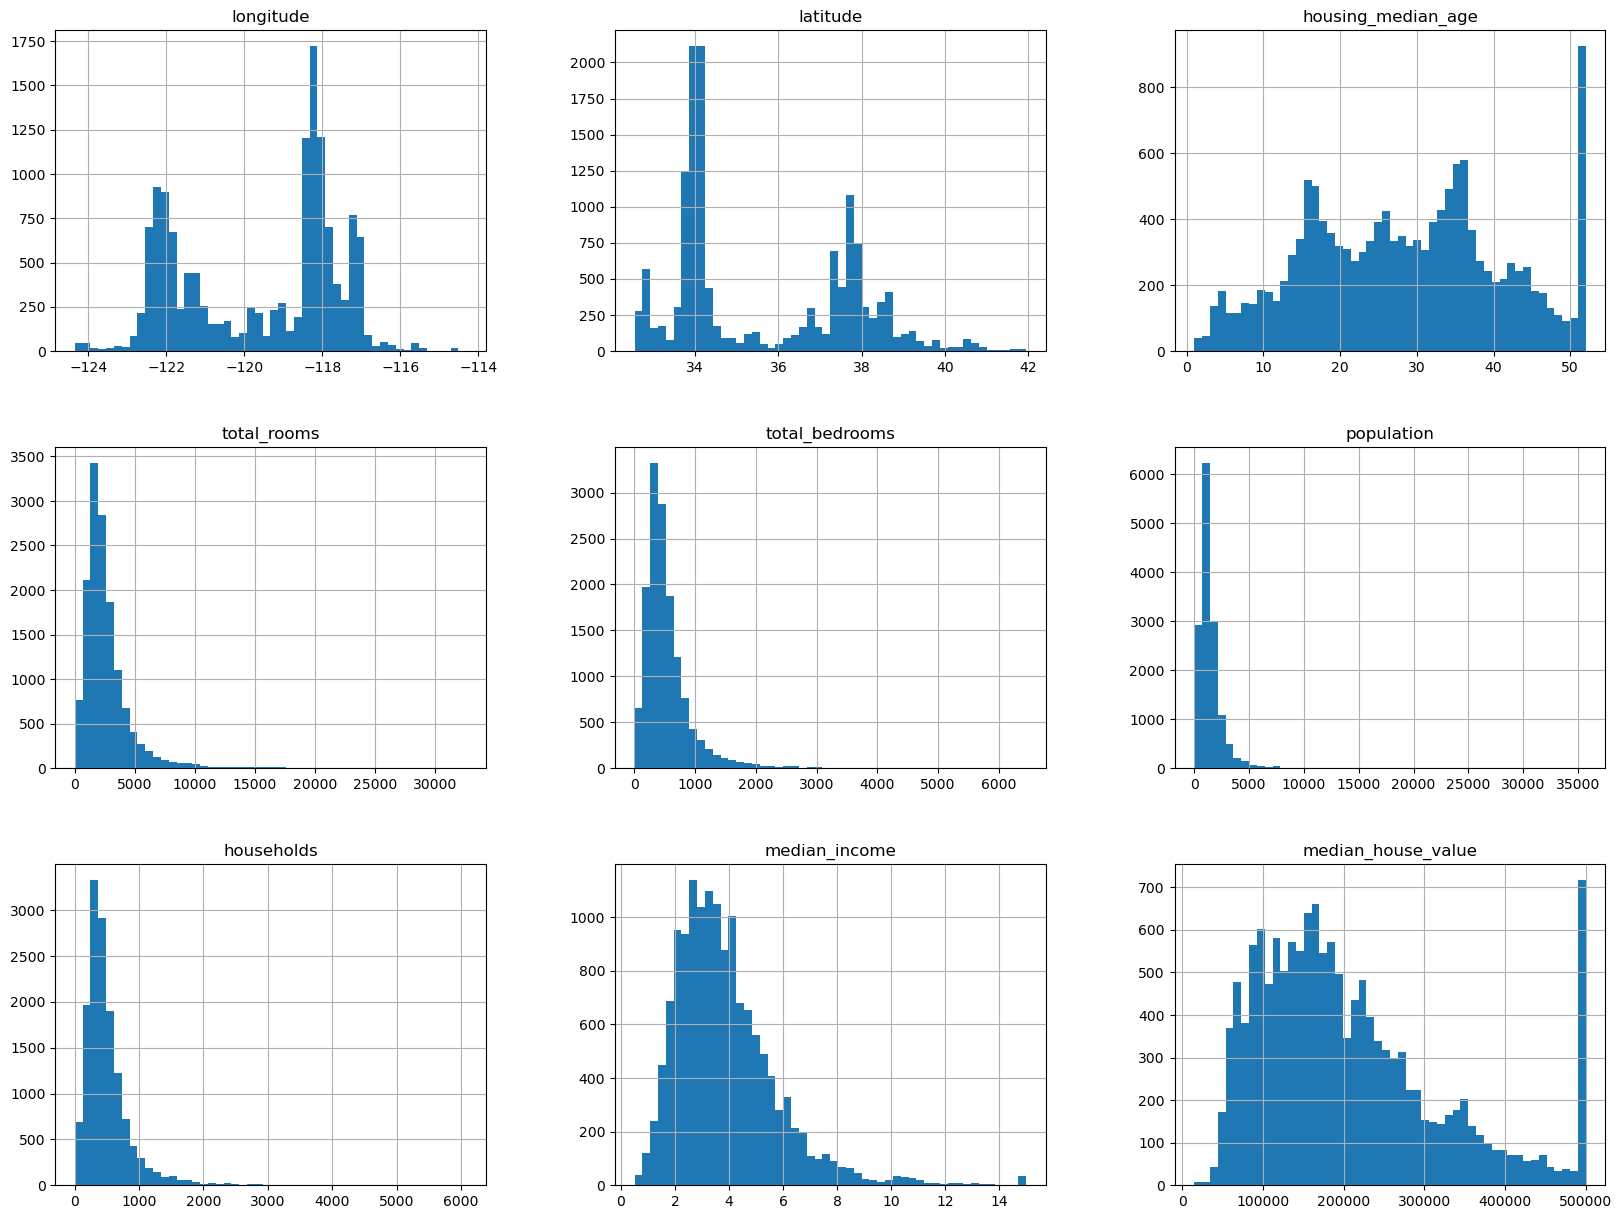

In [10]:
%matplotlib inline 
##uses jupyters own backend for inline plotting
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show() 

* Usia median perumahan (housing median age), pendapatan median (median income), dan nilai median rumah (median house value) telah mengalami preprocessing.
* Pendapatan median telah discaling, dimana nilai sebenarnya adalah nilai preprocessing dikalikan dengan puluhan ribu, misalnya 6 sebenarnya adalah 60.000 USD.
* Nilai rumah median telah dibatasi (capped) pada 500 ribu dolar. Mungkin saja pengumpulan data memiliki batasan atas untuk nilai rumah, misalnya hanya mencatat rumah-rumah dengan nilai tertinggi hingga batasan tertentu, yang dalam kasus ini adalah USD500,001. Hal ini dapat menyebabkan semua rumah dengan nilai di atas batasan tersebut direpresentasikan dengan nilai maksimum tersebut. Ini dapat menyebabkan algoritma Machine Learning untuk menganggap bahwa nilai rumah tidak melebihi harga tersebut, yang dapat menjadi masalah karena ini merupakan nilai target dari tugas tersebut.
* Terdapat perbedaan dalam skala antara atribut-atribut yang diamati. Sebagai contoh, pendapatan median (yang telah discaling) memiliki rentang nilai yang lebih besar dibandingkan dengan usia median perumahan atau nilai median rumah.
* Beberapa atribut memiliki distribusi yang condong ke arah ekor kanan (tail-heavy), yang berarti sebagian besar data terkonsentrasi di sebelah kiri median dan terdapat ekor panjang ke arah nilai yang lebih tinggi. Hal ini dapat dilihat dari histogram yang lebih memanjang ke kanan dari median.

In [11]:
#Konversi Median Income
df['median_income'] = df['median_income']*10000
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -119.79     36.73                52.0        112.0            28.0   
1        -122.21     37.77                43.0       1017.0           328.0   
2        -118.04     33.87                17.0       2358.0           396.0   
3        -118.28     34.06                17.0       2518.0          1196.0   
4        -119.81     36.73                50.0        772.0           194.0   
...          ...       ...                 ...          ...             ...   
14306    -120.06     36.94                19.0        901.0           183.0   
14307    -121.26     38.27                20.0       1314.0           229.0   
14308    -120.89     37.48                27.0       1118.0           195.0   
14309    -117.93     33.62                34.0       2125.0           498.0   
14310    -115.56     32.80                15.0       1171.0           328.0   

       population  households  median_income ocean_proximity  \
0           193.0        40.0        19750.0          INLAND   
1           836.0       277.0        22604.0        NEAR BAY   
2          1387.0       364.0        62990.0       <1H OCEAN   
3          3051.0      1000.0        17199.0       <1H OCEAN   
4           606.0       167.0        22206.0          INLAND   
...           ...         ...            ...             ...   
14306       700.0       190.0        22375.0          INLAND   
14307       712.0       219.0        44125.0          INLAND   
14308       647.0       209.0        29135.0          INLAND   
14309      1052.0       468.0        56315.0       <1H OCEAN   
14310      1024.0       298.0        13882.0          INLAND   

       median_house_value  
0                 47500.0  
1                100000.0  
2                285800.0  
3                175000.0  
4                 59200.0  
...                   ...  
14306             64300.0  
14307            144600.0  
14308            159400.0  
14309            484600.0  
14310             69400.0  

[14311 rows x 10 columns]

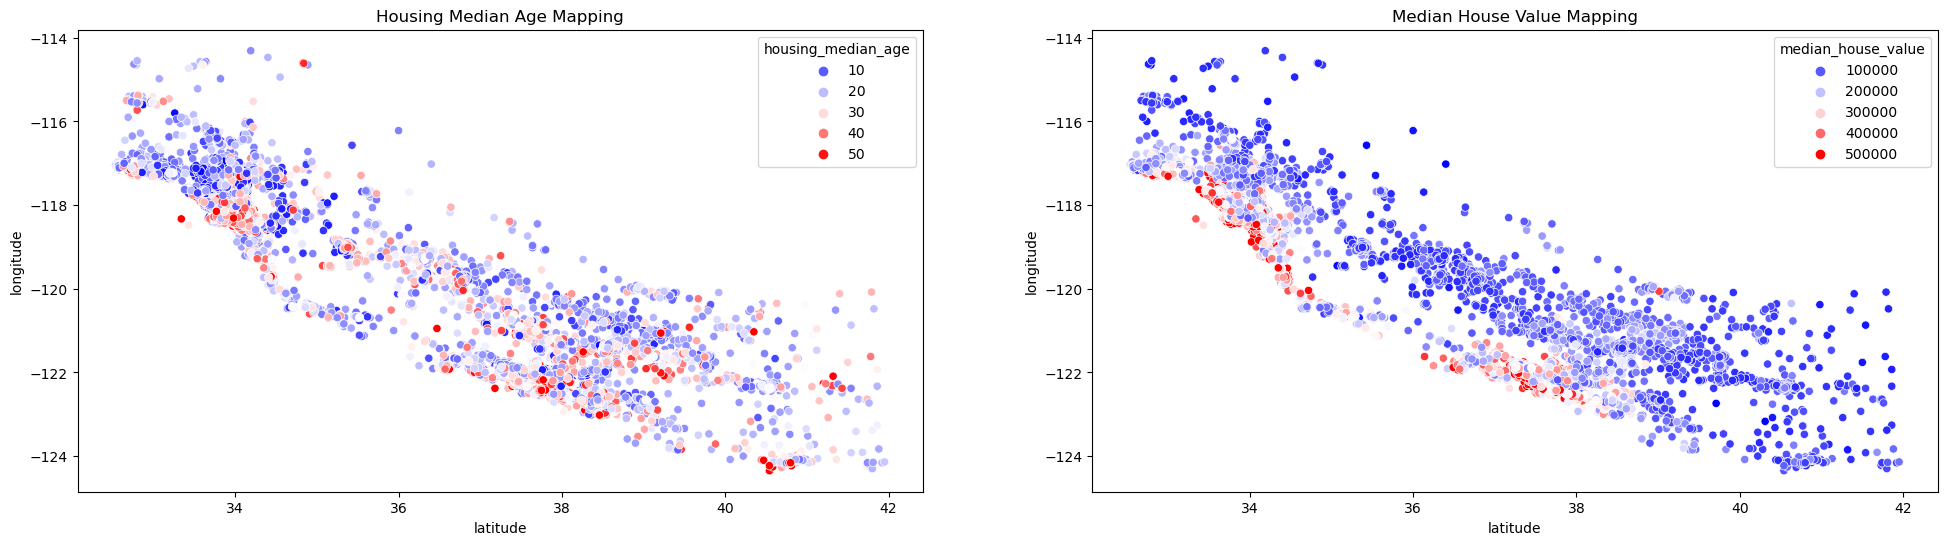

In [12]:
plt.figure(figsize=(24,6))

plt.subplot(1,2,1)
sns.scatterplot(data=df,x='latitude',y='longitude',hue='housing_median_age',palette='bwr',sizes=(10,100))
plt.title('Housing Median Age Mapping')


plt.subplot(1,2,2)
sns.scatterplot(data=df,x='latitude',y='longitude',hue='median_house_value',palette='bwr',sizes=(10,100))
plt.title('Median House Value Mapping')


plt.show()

Housing Median Age Mapping:
* Rentang rata-rata usia bangunan adalah antara 10 hingga 50 tahun.
* Usia bangunan tersebar di seluruh wilayah California, menunjukkan variasi usia bangunan di berbagai daerah.

Median House Value Mapping:
* Terdapat perbedaan harga rumah antara wilayah pesisir dan wilayah yang jauh dari pesisir.
* Harga rumah di wilayah pesisir cenderung lebih tinggi dibandingkan dengan harga rumah di wilayah yang jauh dari pesisir. Hal ini mungkin disebabkan oleh faktor-faktor seperti lokasi, aksesibilitas, fasilitas, dan permintaan pasar yang lebih tinggi di wilayah pesisir.

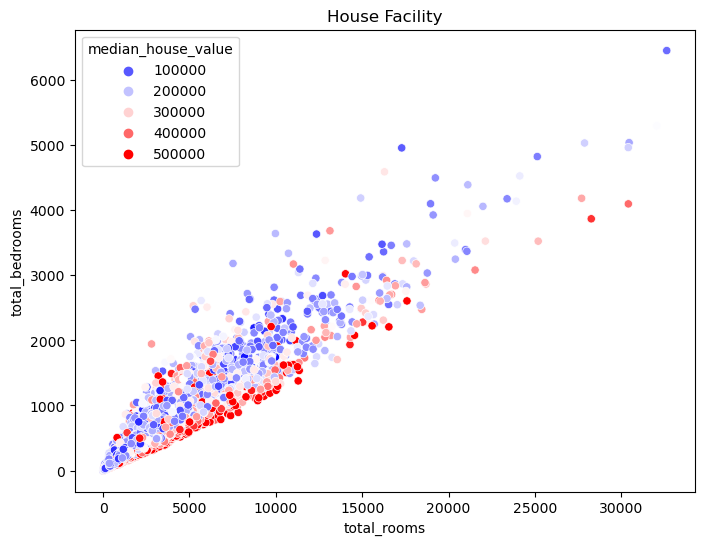

In [13]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df,x='total_rooms',y='total_bedrooms',hue='median_house_value',palette='bwr')
plt.title('House Facility')
plt.show()

Berdasarkan grafik scatterplot yang diamati, tidak terlihat pola yang jelas atau hubungan yang khas antara jumlah total ruangan dan kamar tidur di dalam setiap blok perumahan dengan rata-rata harga rumah.

Ini menunjukkan bahwa jumlah total ruangan dan kamar tidur di dalam setiap blok perumahan mungkin bukan faktor utama yang mempengaruhi harga rumah secara signifikan.

### House Value

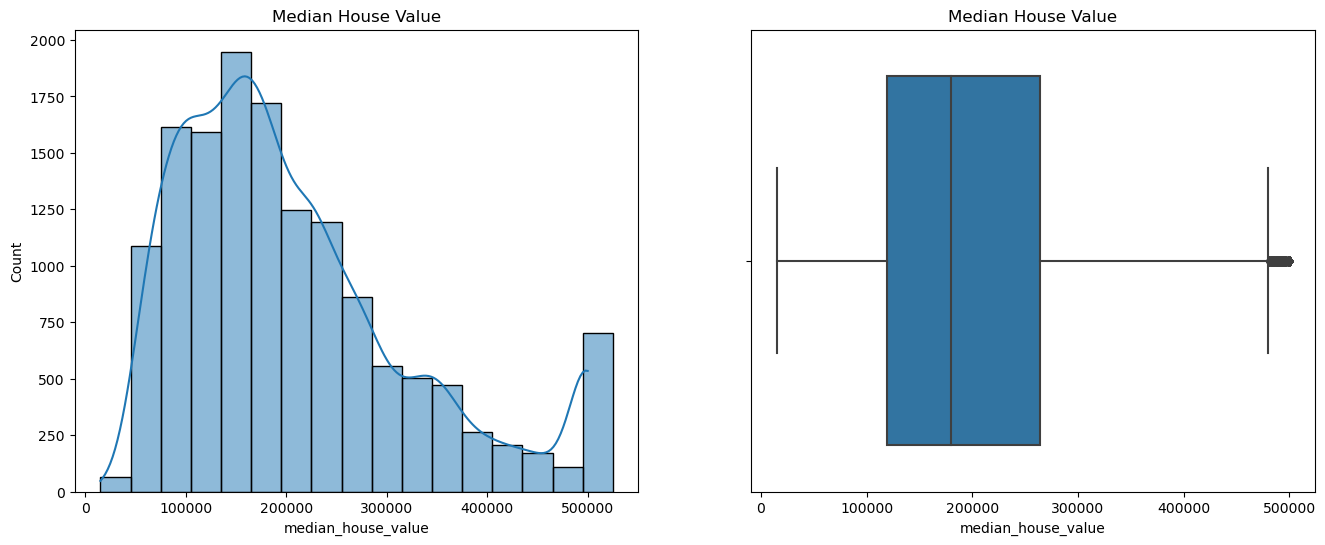

In [14]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
sns.histplot(df['median_house_value'],binwidth=30000,kde=True)
plt.title('Median House Value')

plt.subplot(1,2,2)
sns.boxplot(x= df['median_house_value'])
plt.title('Median House Value')

plt.show()

Berdasarkan histogram yang diamati, terlihat bahwa distribusi data pada kolom median_house_value tidak mengikuti pola distribusi normal.
Grafik histogram menunjukkan bahwa distribusi data cenderung miring ke kanan (skewed right) atau disebut juga memiliki ekor panjang di sebelah kanan dari median.
Hal ini menunjukkan bahwa sebagian besar nilai median_house_value cenderung berada pada nilai yang lebih rendah, sementara terdapat sejumlah kecil nilai yang sangat tinggi di sebelah kanan histogram.

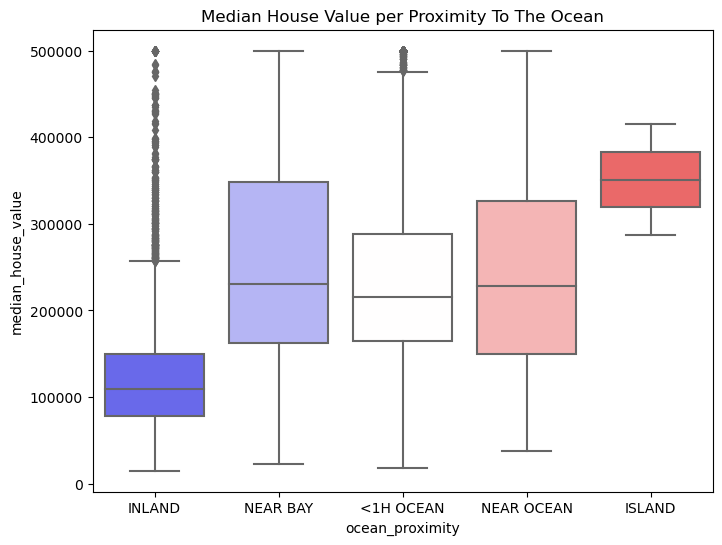

In [15]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df,x='ocean_proximity',y='median_house_value',palette='bwr')
plt.title('Median House Value per Proximity To The Ocean')
plt.show()

Outlier-outlier dalam data dapat mempengaruhi rata-rata harga rumah di setiap daerah, sehingga menyebabkan distribusi data secara keseluruhan tidak mengikuti pola distribusi normal.

In [16]:
import plotly.express as px

fig = px.scatter_mapbox(df, lat="latitude", lon="longitude", color="median_house_value", color_continuous_scale=["#24459C","#1D90C0","#63C3BF","#CBEBB4","#F9FDCC"], title="House Location by Median Value", zoom=4, mapbox_style="carto-positron", width=1000, height=500)
fig.show()

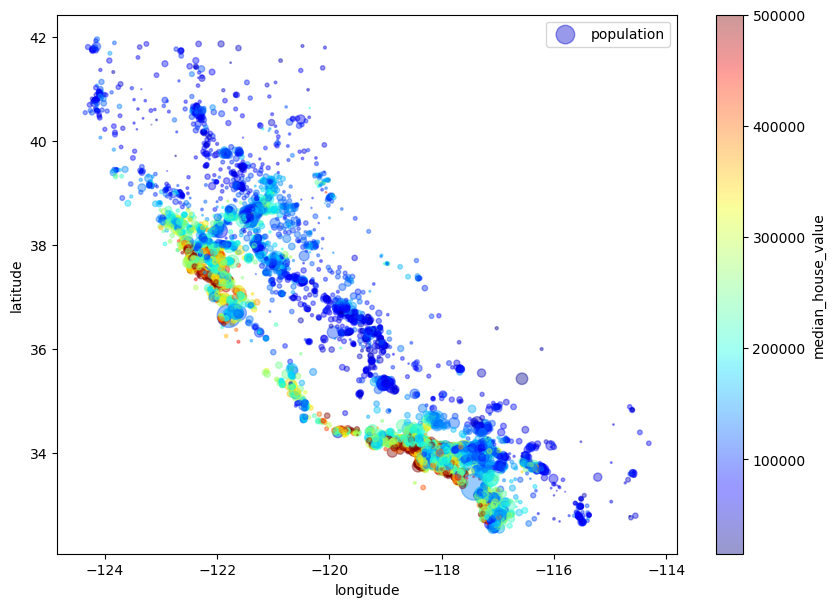

In [17]:
df.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.4, 
             #option s makes size of each circle represent the districts population size
             s = df["population"]/100, label = "population", figsize = (10,7),
             #option c makes the colors represent the prices
             #for this we use predefinded colormap "jet" raning from low (blue) to high prices(red)
             c = "median_house_value", cmap = plt.get_cmap("jet"), colorbar = True
)

plt.legend()

* Harga rumah tertinggi cenderung terdapat di sepanjang pantai. Ini menunjukkan bahwa kedekatan dengan laut merupakan faktor yang berpengaruh dalam menentukan harga rumah.
* Harga rumah terendah cenderung berada di daerah pedalaman dan daerah dengan kepadatan penduduk yang lebih rendah. Hal ini mengindikasikan bahwa faktor-faktor seperti lokasi yang terpencil dan kepadatan penduduk yang rendah dapat mempengaruhi penurunan harga rumah.
* Terdapat kecenderungan umum bahwa semakin jauh dari laut, harga perumahan menjadi lebih murah. Ini menunjukkan bahwa kedekatan dengan laut secara umum meningkatkan harga rumah.
* Perumahan cenderung lebih mahal di kota-kota besar. Hal ini dapat disebabkan oleh kebutuhan akan aksesibilitas, fasilitas perkotaan, dan permintaan yang tinggi di kota-kota besar.
* Kombinasi antara kedekatan dengan kota besar dan laut cenderung meningkatkan harga rumah. Hal ini menunjukkan bahwa faktor-faktor seperti aksesibilitas, pemandangan, dan fasilitas yang terkait dengan kedua lokasi tersebut dapat berkontribusi pada kenaikan harga rumah.

### Uji Korelasi

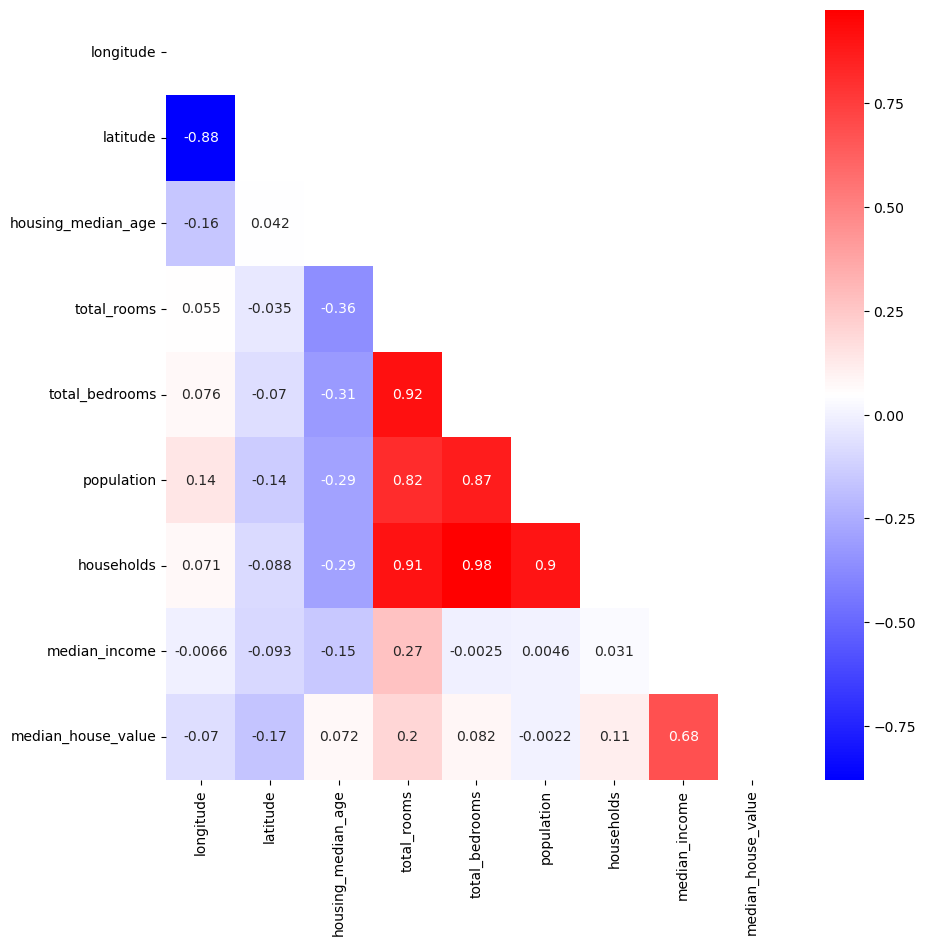

In [18]:
#Mengevaluasi korelasi fitur
df_without_ocean_proximity = df.drop(columns=['ocean_proximity'])

plt.figure(figsize=(10,10))
corr = df_without_ocean_proximity.corr(method='spearman')
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(data=corr, cmap='bwr', mask=mask, annot=True)
plt.show()

Dari grafik diatas dapat disimpulkan:

* Korelasi tertinggi terdapat pada atribut households dengan jumlah ruangan (total_rooms), kamar tidur (total_bedrooms), dan populasi (population), yang masing-masing memiliki korelasi sebesar 0.91, 0.98, dan 0.9. Nilai korelasi yang tinggi antara households dan jumlah ruangan, kamar tidur, serta populasi menunjukkan bahwa jumlah rumah tangga cenderung berkorelasi kuat dengan ukuran rumah dan jumlah penduduk di suatu daerah.
* Terdapat korelasi yang signifikan antara median_house_value dan median_income sebesar 0.68. Nilai korelasi yang positif menunjukkan adanya hubungan yang cukup kuat antara pendapatan median dengan nilai rumah median di suatu daerah. Hal ini mengindikasikan bahwa semakin tinggi pendapatan median di suatu daerah, kemungkinan besar nilai rumah median di daerah tersebut juga akan lebih tinggi.

# Data Preparation

### New Column

Dengan asumsi bahwa setiap rumah tangga menempati satu rumah, kita dapat menghitung rata-rata banyak kamar tidur per rumah dan rata-rata banyak ruangan per rumah dengan cara berikut:

1. Rata-rata banyak kamar tidur per rumah:
    * Ini dapat dihitung dengan membagi total jumlah kamar tidur (total_bedrooms) dengan jumlah rumah tangga (households).
    * Rumusnya adalah: Rata-rata banyak kamar tidur per rumah = total_bedrooms / households.
2. Rata-rata banyak ruangan per rumah:
    * Ini dapat dihitung dengan membagi total jumlah ruangan (total_rooms) dengan jumlah rumah tangga (households).
    * Rumusnya adalah: Rata-rata banyak ruangan per rumah = total_rooms / households.

In [19]:
df['avg_rooms_num'] = round(df['total_rooms']/df['households'])
df['avg_bedrooms_num'] = round(df['total_bedrooms']/df['households'])
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -119.79     36.73                52.0        112.0            28.0   
1        -122.21     37.77                43.0       1017.0           328.0   
2        -118.04     33.87                17.0       2358.0           396.0   
3        -118.28     34.06                17.0       2518.0          1196.0   
4        -119.81     36.73                50.0        772.0           194.0   
...          ...       ...                 ...          ...             ...   
14306    -120.06     36.94                19.0        901.0           183.0   
14307    -121.26     38.27                20.0       1314.0           229.0   
14308    -120.89     37.48                27.0       1118.0           195.0   
14309    -117.93     33.62                34.0       2125.0           498.0   
14310    -115.56     32.80                15.0       1171.0           328.0   

       population  households  median_income ocean_proximity  \
0           193.0        40.0        19750.0          INLAND   
1           836.0       277.0        22604.0        NEAR BAY   
2          1387.0       364.0        62990.0       <1H OCEAN   
3          3051.0      1000.0        17199.0       <1H OCEAN   
4           606.0       167.0        22206.0          INLAND   
...           ...         ...            ...             ...   
14306       700.0       190.0        22375.0          INLAND   
14307       712.0       219.0        44125.0          INLAND   
14308       647.0       209.0        29135.0          INLAND   
14309      1052.0       468.0        56315.0       <1H OCEAN   
14310      1024.0       298.0        13882.0          INLAND   

       median_house_value  avg_rooms_num  avg_bedrooms_num  
0                 47500.0            3.0               1.0  
1                100000.0            4.0               1.0  
2                285800.0            6.0               1.0  
3                175000.0            3.0               1.0  
4                 59200.0            5.0               1.0  
...                   ...            ...               ...  
14306             64300.0            5.0               1.0  
14307            144600.0            6.0               1.0  
14308            159400.0            5.0               1.0  
14309            484600.0            5.0               1.0  
14310             69400.0            4.0               1.0  

[14311 rows x 12 columns]

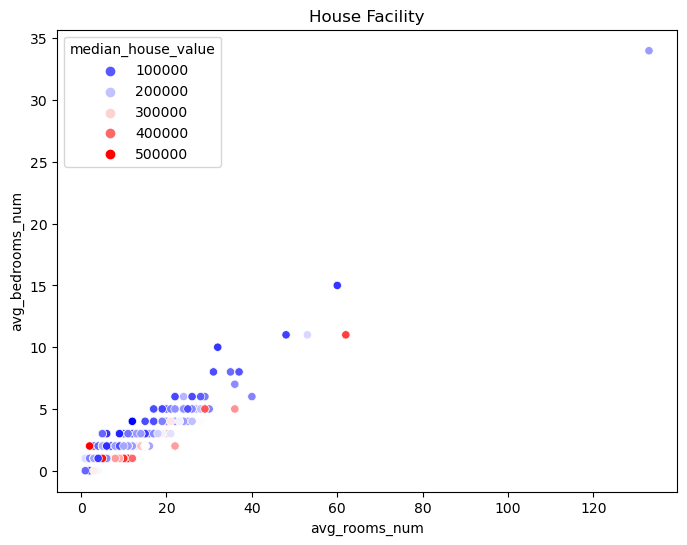

In [20]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df,x='avg_rooms_num',y='avg_bedrooms_num',hue='median_house_value',palette='bwr')
plt.title('House Facility')
plt.show()

### Filtering

Filtering dilakukan untuk menyeleksi dataset dari outlier pada kolom median_house_value dengan menerapkan treshold pada Q3, yang merupakan nilai pada kuartil ketiga dari distribusi nilai median_house_value. Treshold pada Q3 menunjukkan batasan atas yang diterapkan pada nilai median_house_value. Data yang memiliki nilai median_house_value di atas treshold ini akan dianggap sebagai outlier dan akan dikeluarkan dari dataset. Deskripsi statistik dari dataset yang telah difilter akan mencerminkan distribusi yang lebih representatif dari data, tanpa pengaruh outlier.

In [21]:
#Menentukan batas ambang filter
q1 = np.percentile(df['median_house_value'], 25)
q3 = np.percentile(df['median_house_value'], 75)
iqr = q3-q1
tresh = q3 + 1.5*iqr
tresh

480275.0

In [22]:
#Menyaring data dengan median_house_value di atas batas ambang
data = df[df['median_house_value'] < tresh]
data

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -119.79     36.73                52.0        112.0            28.0   
1        -122.21     37.77                43.0       1017.0           328.0   
2        -118.04     33.87                17.0       2358.0           396.0   
3        -118.28     34.06                17.0       2518.0          1196.0   
4        -119.81     36.73                50.0        772.0           194.0   
...          ...       ...                 ...          ...             ...   
14305    -117.10     32.73                24.0       2927.0           704.0   
14306    -120.06     36.94                19.0        901.0           183.0   
14307    -121.26     38.27                20.0       1314.0           229.0   
14308    -120.89     37.48                27.0       1118.0           195.0   
14310    -115.56     32.80                15.0       1171.0           328.0   

       population  households  median_income ocean_proximity  \
0           193.0        40.0        19750.0          INLAND   
1           836.0       277.0        22604.0        NEAR BAY   
2          1387.0       364.0        62990.0       <1H OCEAN   
3          3051.0      1000.0        17199.0       <1H OCEAN   
4           606.0       167.0        22206.0          INLAND   
...           ...         ...            ...             ...   
14305      2005.0       668.0        22375.0      NEAR OCEAN   
14306       700.0       190.0        22375.0          INLAND   
14307       712.0       219.0        44125.0          INLAND   
14308       647.0       209.0        29135.0          INLAND   
14310      1024.0       298.0        13882.0          INLAND   

       median_house_value  avg_rooms_num  avg_bedrooms_num  
0                 47500.0            3.0               1.0  
1                100000.0            4.0               1.0  
2                285800.0            6.0               1.0  
3                175000.0            3.0               1.0  
4                 59200.0            5.0               1.0  
...                   ...            ...               ...  
14305            102900.0            4.0               1.0  
14306             64300.0            5.0               1.0  
14307            144600.0            6.0               1.0  
14308            159400.0            5.0               1.0  
14310             69400.0            4.0               1.0  

[13560 rows x 12 columns]

### One-Hot Encoding

One hot encoding adalah sebuah teknik yang digunakan dalam pemrosesan data untuk mengubah variabel kategori (kategori yang bersifat nominal atau kategori yang tidak memiliki urutan) menjadi bentuk biner, sehingga dapat digunakan lebih efektif dalam algoritma ML.

Dalam konteks ocean proximity, yang merupakan variabel kategori yang menunjukkan lokasi perumahan berdasarkan kedekatannya dengan laut, one hot encoding akan mengonversi variabel ini menjadi serangkaian variabel biner, di mana setiap variabel biner akan mewakili satu kategori dari variabel asli.

Misalnya, jika terdapat empat kategori dalam variabel ocean proximity, yaitu "INLAND", "<1H OCEAN", "NEAR BAY", dan "NEAR OCEAN", maka one hot encoding akan menghasilkan empat variabel biner baru:

* Variabel pertama mewakili kategori "INLAND".
* Variabel kedua mewakili kategori "<1H OCEAN".
* Variabel ketiga mewakili kategori "NEAR BAY".
* Variabel keempat mewakili kategori "NEAR OCEAN".

Dalam variabel biner tersebut, nilai 1 menunjukkan keberadaan kategori yang sesuai, sedangkan nilai 0 menunjukkan ketiadaan kategori tersebut.

In [23]:
# Perform one-hot encoding on the 'ocean_proximity' column
ocean_proximity_encoded = pd.get_dummies(data['ocean_proximity'], prefix='ocean_proximity')

# Drop the 'ocean_proximity' column from the original DataFrame
df_without_ocean_proximity = data.drop(columns=['ocean_proximity'])

# Concatenate the one-hot encoded DataFrame with the original DataFrame
df_encoded = pd.concat([df_without_ocean_proximity, ocean_proximity_encoded], axis=1)

# Display the new DataFrame
print(df_encoded)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -119.79     36.73                52.0        112.0            28.0   
1        -122.21     37.77                43.0       1017.0           328.0   
2        -118.04     33.87                17.0       2358.0           396.0   
3        -118.28     34.06                17.0       2518.0          1196.0   
4        -119.81     36.73                50.0        772.0           194.0   
...          ...       ...                 ...          ...             ...   
14305    -117.10     32.73                24.0       2927.0           704.0   
14306    -120.06     36.94                19.0        901.0           183.0   
14307    -121.26     38.27                20.0       1314.0           229.0   
14308    -120.89     37.48                27.0       1118.0           195.0   
14310    -115.56     32.80                15.0       1171.0           328.0   

       population  households  median_income  media

### Data Splitting

Proses ini memungkinkan untuk melakukan pelatihan (training) model pada data training dan menguji (testing) kinerja model pada data testing, yang dapat membantu dalam evaluasi kinerja model dan menghindari overfitting.

In [24]:
x = data.drop(columns=['median_house_value'])
y = data['median_house_value']

In [25]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [26]:
# Print the distribution of data between the training and testing dataset

print("Data in x_train: " + str(len(x_train)))
print("Data in y_train: " + str(len(y_train)))
print("Data in x_test: " + str(len(x_test)))
print("Data in y_test: " + str(len(y_test)))

Data in x_train: 10848
Data in y_train: 10848
Data in x_test: 2712
Data in y_test: 2712


* Variabel x menyimpan fitur-fitur (kolom-kolom) dari data, dengan kolom 'median_house_value' dihapus.
* Variabel y menyimpan target dari data, yaitu kolom 'median_house_value'.
* test_size=0.2 menunjukkan bahwa data testing akan berukuran 20% dari keseluruhan data.
* random_state=10 adalah seed yang digunakan untuk menghasilkan pengacakan data yang konsisten. Ini memastikan bahwa pembagian data menjadi train dan test akan konsisten setiap kali kode dijalankan.

### Scaling

Proses scaling dilakukan pada data training dan data testing menggunakan StandardScaler dari modul preprocessing dalam library scikit-learn.
StandardScaler digunakan untuk mentransformasi fitur-fitur (kolom-kolom) dalam data sehingga memiliki mean (rerata) 0 dan standar deviasi (simpangan baku) 1.
Skala yang seragam ini membantu dalam meningkatkan konvergensi algoritma pembelajaran mesin dan meningkatkan konsistensi hasil model.

In [27]:
x_train = x_train.drop(columns=['ocean_proximity'])
x_test = x_test.drop(columns=['ocean_proximity'])

In [28]:
# Scaling the x training and testing dataset
scaler = preprocessing.StandardScaler().fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

# 6. Modeling

### Choose a Benchmark Model

In [29]:
def ML_test(Mdl):
    mdl = Mdl.fit(x_train_scaled, y_train)
    y_pred = mdl.predict(x_test_scaled)
    train_acc_score = "%.2f%%" % (mdl.score(x_train_scaled, y_train)*100)
    test_acc_score = "%.2f%%" % (mdl.score(x_test_scaled, y_test)*100)
    evs = round(explained_variance_score(y_test,y_pred),4)
    mae = round(mean_absolute_error(y_test,y_pred),4)
    mse = round(mean_squared_error(y_test,y_pred),4)
    
    return train_acc_score, test_acc_score, evs, mae, mse

In [30]:
# Prepare an empty summary dataframe to append the data of the various models for comparison
summary = pd.DataFrame(columns=('Model', 'Training Accuracy', 'Test Accuracy Score','Test explained_variance_score', \
                                'Test MAE', 'Test MSE'))

In [31]:
# Linear Regression Model

mdl_LR = LinearRegression()
model_name = "LinearRegression"

train_acc_score, test_acc_score, evs, mae, mse = ML_test(mdl_LR)

summary = summary._append({'Model' : model_name, 'Training Accuracy' : train_acc_score, 'Test Accuracy Score' : test_acc_score,\
                       'Test explained_variance_score' : evs, 'Test MAE' : mae, 'Test MSE': mse}, \
                         ignore_index=True)

In [32]:
# Ridge Model

mdl_R = Ridge()
Param_grid = {'alpha': list(np.arange(0.1,1.1,0.1))}
model_name = "Ridge"

Mdl = GridSearchCV(mdl_R,Param_grid,cv=10)

train_acc_score, test_acc_score, evs, mae, mse = ML_test(Mdl)

summary = summary._append({'Model' : model_name, 'Training Accuracy' : train_acc_score, 'Test Accuracy Score' : test_acc_score,\
                       'Test explained_variance_score' : evs, 'Test MAE' : mae, 'Test MSE': mse}, \
                         ignore_index=True)

In [33]:
# Lasso Model

mdl_L = Lasso()
model_name = "Lasso"

Mdl = GridSearchCV(mdl_L,Param_grid,cv=10)

train_acc_score, test_acc_score, evs, mae, mse = ML_test(Mdl)

summary = summary._append({'Model' : model_name, 'Training Accuracy' : train_acc_score, 'Test Accuracy Score' : test_acc_score,\
                       'Test explained_variance_score' : evs, 'Test MAE' : mae, 'Test MSE': mse}, \
                         ignore_index=True)

In [34]:
# Decision Tree Regressor Model

mdl_dt = DecisionTreeRegressor(random_state=1)
model_name = "DecisionTree Regressor"

train_acc_score, test_acc_score, evs, mae, mse = ML_test(mdl_dt)

summary = summary._append({'Model' : model_name, 'Training Accuracy' : train_acc_score, 'Test Accuracy Score' : test_acc_score,\
                       'Test explained_variance_score' : evs, 'Test MAE' : mae, 'Test MSE': mse}, \
                         ignore_index=True)

In [35]:
# Random Forest Regressor Model

mdl_rf = RandomForestRegressor(random_state=1)
model_name = "RandomForest Regressor"

train_acc_score, test_acc_score, evs, mae, mse = ML_test(mdl_rf)

summary = summary._append({'Model' : model_name, 'Training Accuracy' : train_acc_score, 'Test Accuracy Score' : test_acc_score,\
                       'Test explained_variance_score' : evs, 'Test MAE' : mae, 'Test MSE': mse}, \
                         ignore_index=True)

In [36]:
# AdaBoost Regressor Model

mdl_ADR = AdaBoostRegressor(random_state=7).fit(x_train_scaled, y_train)
model_name = "AdaBoost Regressor"

train_acc_score, test_acc_score, evs, mae, mse = ML_test(mdl_ADR)

summary = summary._append({'Model' : model_name, 'Training Accuracy' : train_acc_score, 'Test Accuracy Score' : test_acc_score,\
                       'Test explained_variance_score' : evs, 'Test MAE' : mae, 'Test MSE': mse}, \
                         ignore_index=True)

In [37]:
# Bagging Regressor Model

mdl_BagR = BaggingRegressor(random_state=7).fit(x_train, y_train)
model_name = "Bagging Regressor"

train_acc_score, test_acc_score, evs, mae, mse = ML_test(mdl_BagR)

summary = summary._append({'Model' : model_name, 'Training Accuracy' : train_acc_score, 'Test Accuracy Score' : test_acc_score,\
                       'Test explained_variance_score' : evs, 'Test MAE' : mae, 'Test MSE': mse}, \
                         ignore_index=True)

In [38]:
summary

Model Training Accuracy Test Accuracy Score  \
0        LinearRegression            59.87%              60.93%   
1                   Ridge            59.87%              60.93%   
2                   Lasso            59.87%              60.93%   
3  DecisionTree Regressor           100.00%              55.75%   
4  RandomForest Regressor            96.72%              78.02%   
5      AdaBoost Regressor            35.95%              34.68%   
6       Bagging Regressor            95.27%              74.96%   

   Test explained_variance_score    Test MAE      Test MSE  
0                         0.6095  45399.1775  3.594624e+09  
1                         0.6095  45398.6168  3.594570e+09  
2                         0.6095  45399.3454  3.594624e+09  
3                         0.5582  43375.2212  4.070682e+09  
4                         0.7806  30917.6754  2.021850e+09  
5                         0.5196  66866.6547  6.009351e+09  
6                         0.7499  33371.9431  2.303665e+09

Dari perbandingan diatas dapat disimpulkan :

* Model **RandomForest Regressor** menunjukkan performa yang cukup baik dengan akurasi training sekitar 96.72% dan akurasi test sekitar 78.02%. Nilai explained variance score yang tinggi (0.7806) juga menunjukkan bahwa model ini mampu menjelaskan variasi yang signifikan dalam data.
* Selain itu, RandomForest Regressor juga memiliki nilai MAE dan MSE yang relatif rendah dibandingkan dengan model lainnya, yaitu sekitar 30917 dan 2.021850e+09, secara berurutan.

### Predict to Test Set with the Benchmark Model

Model benchmark yang telah dipilih (RandomForest Regressor) akan digunakan untuk melakukan prediksi terhadap set data uji (x_test).

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error, mean_absolute_percentage_error
import numpy as np
import pandas as pd

# Define the transformer
transformer = ColumnTransformer([
    ('num', StandardScaler(), x_train.columns)  # assuming x_train contains all numerical features
], remainder='passthrough')

# Create the Random Forest Regressor model
rf = RandomForestRegressor(random_state=10)

# Initialize lists to store evaluation scores
score_rmse = []
score_mae = []
score_rmsle = []
score_mape = []

# Create the pipeline
rf_pipeline = Pipeline([
    ('preprocessing', transformer),
    ('model', rf)
])

# Fit the pipeline on the training data
rf_pipeline.fit(x_train, y_train)

# Predict on the test set
y_pred = rf_pipeline.predict(x_test)

# Compute evaluation metrics
score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
score_mae.append(mean_absolute_error(y_test, y_pred))
score_rmsle.append(mean_squared_log_error(y_test, y_pred, squared=False))
score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

# Create a DataFrame to store evaluation scores
score_before_tuning_rf = pd.DataFrame({
    'RMSE': score_rmse,
    'MAE': score_mae,
    'RMSLE': score_rmsle,
    'MAPE': score_mape
})

# Display the evaluation scores
print(score_before_tuning_rf)


           RMSE           MAE     RMSLE      MAPE
0  45117.810175  31074.880767  0.237974  0.185637


### Tuning Model

Tuning dilakukan dengan tujuan untuk meningkatkan kinerja model dalam memprediksi nilai median harga rumah. Melalui proses tuning, parameter-parameter seperti jumlah pohon dalam ensemble, kedalaman maksimum setiap pohon, dan jumlah fitur yang dipertimbangkan untuk pemisahan setiap node dalam pohon dipelajari dan dioptimalkan. Hal ini membantu dalam menyesuaikan model secara lebih baik terhadap pola dan kompleksitas data yang ada, sehingga menghasilkan prediksi yang lebih akurat 

In [47]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error, mean_absolute_percentage_error, r2_score

# Define the transformer
transformer = ColumnTransformer([
    ('num', StandardScaler(), x_train.columns)  # assuming x_train contains all numerical features
], remainder='passthrough')

# Create the pipeline
rf_pipeline = Pipeline([
    ('preprocessing', transformer),
    ('model', RandomForestRegressor(random_state=10))
])

# Define the parameter distributions for Randomized Search
param_dist = {
    'model__n_estimators': [100, 200, 300],  # Reduced number of trees
    'model__max_depth': [None, 5, 10],        # Limited maximum depth
    'model__min_samples_split': [2, 5],       # Fewer values for minimum samples split
    'model__min_samples_leaf': [1, 3]         # Fewer values for minimum samples leaf
}

# Create the RandomizedSearchCV object with increased search space and iterations
random_search = RandomizedSearchCV(estimator=rf_pipeline, param_distributions=param_dist, n_iter=10, cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Fit the randomized search on the training data
random_search.fit(x_train, y_train)

# Predict on the test set using the tuned model
y_pred_tuned = random_search.predict(x_test)

# Compute evaluation metrics for the tuned model
score_rmse_tuned = np.sqrt(mean_squared_error(y_test, y_pred_tuned))
score_mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
score_rmsle_tuned = mean_squared_log_error(y_test, y_pred_tuned, squared=False)
score_mape_tuned = mean_absolute_percentage_error(y_test, y_pred_tuned)

# Compute R^2 score for the tuned model
r2_tuned = r2_score(y_test, y_pred_tuned)

# Create a DataFrame to store evaluation scores for the tuned model
score_after_tuning_rf = pd.DataFrame({
    'RMSE': [score_rmse_tuned],
    'MAE': [score_mae_tuned],
    'RMSLE': [score_rmsle_tuned],
    'MAPE': [score_mape_tuned],
    'R^2': [r2_tuned]
})

# Display the evaluation scores for the tuned model
print(score_after_tuning_rf)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
           RMSE           MAE     RMSLE      MAPE      R^2
0  44796.945627  30833.283413  0.236572  0.184358  0.78188


### Improvment after Tuning

In [48]:
# Calculate improvement percentages for each evaluation metric
improvement_rmse = ((score_before_tuning_rf['RMSE'] - score_after_tuning_rf['RMSE']) / score_before_tuning_rf['RMSE']) * 100
improvement_mae = ((score_before_tuning_rf['MAE'] - score_after_tuning_rf['MAE']) / score_before_tuning_rf['MAE']) * 100
improvement_rmsle = ((score_before_tuning_rf['RMSLE'] - score_after_tuning_rf['RMSLE']) / score_before_tuning_rf['RMSLE']) * 100
improvement_mape = ((score_before_tuning_rf['MAPE'] - score_after_tuning_rf['MAPE']) / score_before_tuning_rf['MAPE']) * 100

# Create a DataFrame to store improvement percentages
improvement_df = pd.DataFrame({
    'Metric': ['RMSE', 'MAE', 'RMSLE', 'MAPE'],
    'Improvement(%)': [improvement_rmse.values[0], improvement_mae.values[0], improvement_rmsle.values[0], improvement_mape.values[0]]
})

# Display the improvement percentages
print(improvement_df)


  Metric  Improvement(%)
0   RMSE        0.711170
1    MAE        0.777468
2  RMSLE        0.589071
3   MAPE        0.689275


* RMSE Improvement: Terdapat peningkatan sebesar 0.711170% dalam mengurangi Root Mean Squared Error (RMSE) setelah melakukan tuning model. Hal ini menunjukkan bahwa hasil tuning berhasil memperbaiki tingkat kesalahan prediksi model secara signifikan, meskipun peningkatannya relatif kecil.

* MAE Improvement: Terdapat peningkatan sebesar 0.777468% dalam mengurangi Mean Absolute Error (MAE) setelah melakukan tuning model. Peningkatan ini menunjukkan bahwa hasil tuning berhasil memperbaiki rata-rata kesalahan prediksi model, meskipun perbaikannya tidak signifikan.

* RMSLE Improvement: Terdapat peningkatan sebesar 0.589071% dalam mengurangi Root Mean Squared Logarithmic Error (RMSLE) setelah melakukan tuning model. Ini menunjukkan bahwa hasil tuning berhasil mengurangi tingkat kesalahan prediksi model dalam bentuk logaritma.

* MAPE Improvement: Terdapat peningkatan sebesar 0.689275% dalam mengurangi Mean Absolute Percentage Error (MAPE) setelah melakukan tuning model. Peningkatan ini menunjukkan bahwa hasil tuning berhasil memperbaiki rata-rata persentase kesalahan prediksi model, meskipun peningkatannya tidak signifikan.

Secara keseluruhan, hasil temuan ini menunjukkan bahwa hasil tuning model memiliki dampak positif dalam meningkatkan performa model dalam hal mengurangi tingkat kesalahan prediksi, meskipun peningkatannya tidak selalu signifikan.

### Performance Comparison

#### Comparison between actual and prediction plot

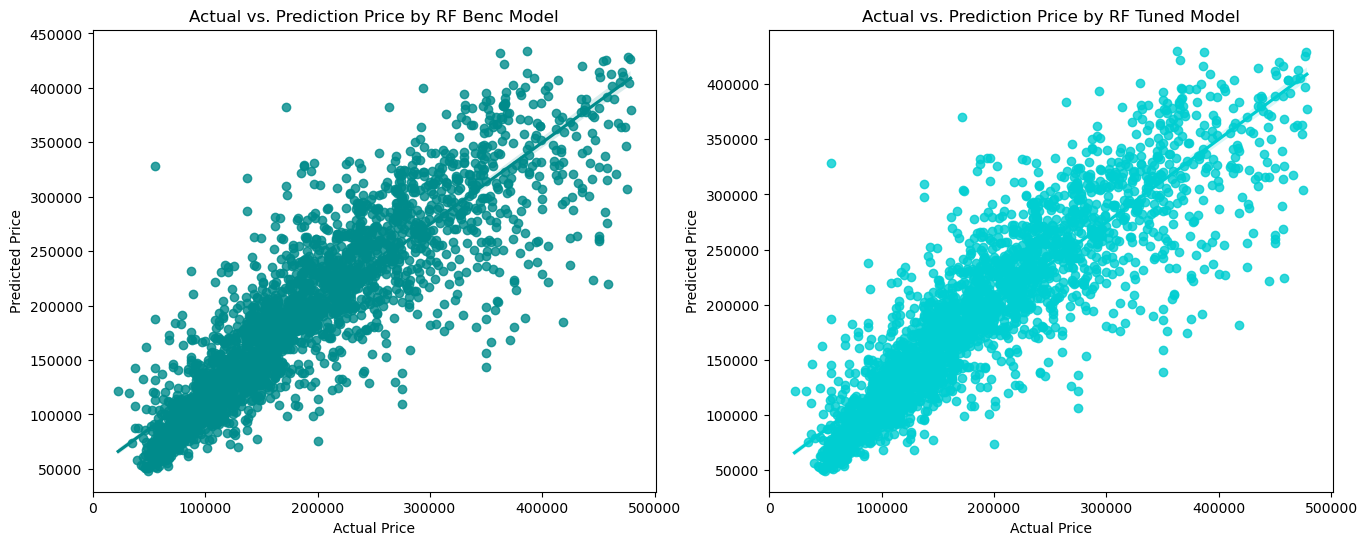

In [49]:
plt.figure(figsize=(16, 6))

plt.subplot(1,2,1)
sns.regplot(x=y_test, y=y_pred,color='darkcyan')
plt.title('Actual vs. Prediction Price by RF Benc Model')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

plt.subplot(1,2,2)
sns.regplot(x=y_test, y=y_pred_tuned,color='darkturquoise')
plt.title('Actual vs. Prediction Price by RF Tuned Model')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

plt.show()

#### Residual Plot Comparison after Tuning

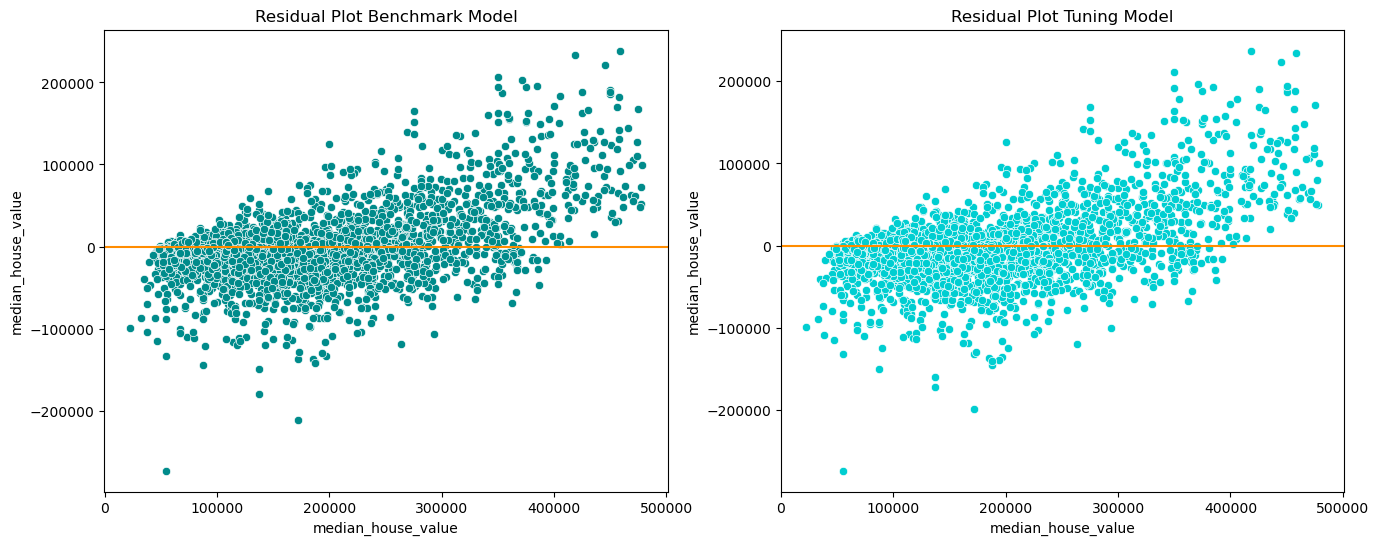

In [50]:
residual_bench = y_test-y_pred
residual_tuned = y_test-y_pred_tuned

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.scatterplot(x=y_test,y=residual_bench,color='darkcyan')
plt.axhline(y = 0,color='darkorange')
plt.title('Residual Plot Benchmark Model')

plt.subplot(1,2,2)
sns.scatterplot(x=y_test,y=residual_tuned,color='darkturquoise')
plt.axhline(y = 0,color='darkorange')
plt.title('Residual Plot Tuning Model')
plt.show()

### Feature Importances

Untuk dapat mengetahui sebenarnya fitur apa saja yang sangat memengaruhi target (price), kita dapat mengeceknya melalui function feature_importances_.

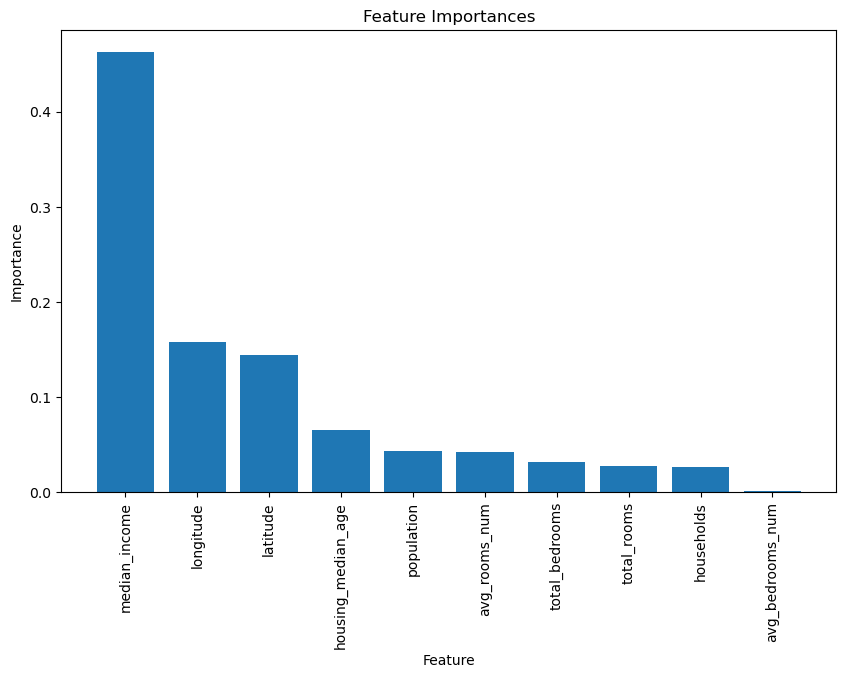

In [51]:
# Access the best estimator from the RandomizedSearchCV object
best_rf_estimator = random_search.best_estimator_

# Get feature importances from the best estimator
feature_importances = best_rf_estimator.named_steps['model'].feature_importances_

# Get feature names
feature_names = x_train.columns

# Sort feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances[sorted_indices], align='center')
plt.xticks(range(len(feature_importances)), feature_names[sorted_indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()


Grafik tersebut menunjukkan nilai signifikansi (atau koefisien) dari setiap fitur dalam model. Dari grafik, dapat diamati bahwa fitur median_income memiliki signifikansi yang paling tinggi dalam mempengaruhi variabilitas nilai target (median_house_value) dalam model, dengan skor melewati nilai 0.4. Hal ini menunjukkan bahwa median_income memiliki pengaruh yang kuat terhadap harga rumah.

Selanjutnya, lokasi rumah (dinyatakan dalam fitur longitude dan latitude serta ocean_proximity) juga memiliki signifikansi yang cukup tinggi dalam model, meskipun tidak sekuat median_income. Signifikansi ini menunjukkan bahwa lokasi rumah juga memiliki pengaruh yang signifikan terhadap harga rumah.

Dari hasil tersebut, dapat disimpulkan bahwa dalam model tersebut, fitur median_income adalah fitur yang paling signifikan dalam memprediksi nilai median_house_value, diikuti oleh fitur lokasi rumah. Oleh karena itu, median_income dan lokasi rumah (longitude dan latitude serta ocean_proximity) dapat dianggap sebagai faktor-faktor utama yang memengaruhi harga rumah dalam model tersebut.

# Conclusion

Maka dapat disimpulkan bahwa:

**Deskripsi Data:**
* Dataset terdiri dari 10 kolom dan 14448 baris data, yang mewakili informasi tentang properti, lokasi, dan nilai dari blok perumahan di California pada tahun 1990.
* Atribut-atribut mencakup informasi seperti koordinat geografis, usia median perumahan, jumlah ruangan dan kamar tidur, populasi, pendapatan median, nilai median rumah, dan lokasi perumahan berdasarkan kedekatannya dengan laut.
* Terdapat beberapa pola yang dapat diamati dari grafik dan visualisasi data, seperti hubungan antara harga rumah dengan kedekatan ke laut, usia median perumahan, dan pendapatan median.

**Analisis Model Machine Learning:**
* Beberapa model Machine Learning telah diuji, seperti Linear Regression, Ridge Regression, Lasso Regression, DecisionTree Regressor, RandomForest Regressor, AdaBoost Regressor, dan Bagging Regressor.
* Berdasarkan hasil evaluasi model, RandomForest Regressor menunjukkan kinerja yang relatif baik, dengan akurasi training sekitar 96.72% dan akurasi test sekitar 78.02%. Model ini juga memiliki nilai MAE dan MSE yang rendah dibandingkan dengan model lainnya.
* Melalui proses tuning, kinerja model dapat sedikit ditingkatkan. Hal ini terlihat dari peningkatan kecil dalam metrik evaluasi seperti RMSE, MAE, RMSLE, dan MAPE setelah tuning.

| **Metric** | **Improvement(%)** |
| --- | --- |
| RMSE | 0.711170 |
| MAE | 0.777468 |
| RMSLE | 0.589071 |
| RMSLE | 0.689275 |

* Jika ditinjau dari nilai MAPE yang dihasilkan oleh model setelah dilakukan  tuning, yaitu sebesar ~18%, kita dapat menyimpulkan bahwa bila nanti model yang dibuat ini digunakan untuk memperkirakan harga listing rumah di California pada rentang nilai seperti yang dilatih terhadap model, maka perkiraan harganya rata-rata akan meleset kurang lebih sebesar 18% dari harga seharusnya.

**Analisis Fitur Model:**
* Grafik signifikansi fitur menunjukkan bahwa fitur median_income memiliki pengaruh yang paling signifikan terhadap nilai median_house_value dalam model.
* Fitur lokasi rumah, seperti longitude, latitude, dan ocean_proximity, juga memiliki pengaruh yang cukup tinggi terhadap nilai median_house_value, meskipun tidak sekuat median_income.

# Recommendation

Berikut adalah rekomendasi untuk pengembangan model selanjutnya:

**Eksplorasi Fitur Tambahan:**
* Melakukan eksplorasi terhadap fitur-fitur tambahan atau membuat fitur turunan baru dari fitur yang sudah ada mungkin dapat meningkatkan kinerja model. Misalnya, dapat ditambahkan fitur baru yang menggambarkan rasio antara jumlah kamar tidur dan jumlah ruangan, atau fitur yang menunjukkan kepadatan populasi di suatu daerah.

**Tuning Model Lebih Lanjut:**
* Meskipun hasil tuning telah memberikan peningkatan kinerja yang sedikit, namun masih ada ruang untuk tuning lebih lanjut. Dapat dicoba dengan menyesuaikan hyperparameter yang berbeda atau menggunakan teknik tuning yang lebih baik seperti Bayesian Optimization.

**Analisis Geospasial:**
* Mencari informasi tambahan tentang jarak kedekatan suatu distrik dengan kota besar. Plot yang telah disajikan menunjukkan pola yang cukup jelas bahwa kedekatan dengan kota besar menunjukkan harga yang lebih tinggi, sementara jarak yang lebih jauh dari kota besar menunjukkan harga yang lebih rendah. Ini juga dapat menjelaskan mengapa harga di bagian utara relatif rendah meskipun dekat dengan pantai - karena distrik-distrik tersebut cukup jauh dari kota besar. Oleh karena itu, mengumpulkan data tentang kedekatan suatu distrik dengan kota besar dapat membantu meningkatkan prediksi harga rumah dengan lebih akurat, karena faktor ini tampaknya memiliki pengaruh signifikan terhadap harga rumah.